1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

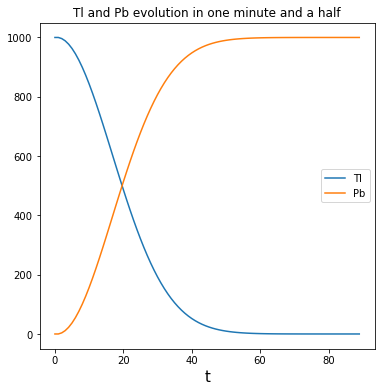

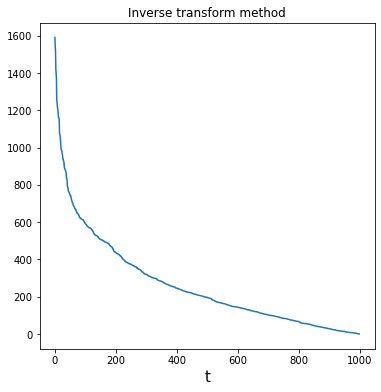

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def prob(t):
    tau = 3.052*60
    return 1 - 2**(-t/tau)

def icdf(t):
    tau = 3.052*60
    return -tau * (np.log2(1-t))

Tl_list = []
Pb_list = []

t = 0
Tl = 1000
Pb = 0

Tl_list.append(Tl)
Pb_list.append(Pb)

for t in range(89):
    Tl_to_Pb = Tl * prob(t)   #total number of Tl atoms that are converted into Pb atoms
    Tl = Tl - Tl_to_Pb
    Pb = Pb + Tl_to_Pb
    Tl_list.append(Tl)
    Pb_list.append(Pb)
    t += 1
    
t = np.arange(0,90,1)

fig, ax = plt.subplots(figsize=(6,6))

ax.plot(t, Tl_list, label="Tl")
ax.plot(t, Pb_list, label="Pb")
ax.set_xlabel("t", fontsize=15)
ax.set_title("Tl and Pb evolution in one minute and a half")
ax.legend()
plt.show()

#inverse transform method
N = 1000
samples = np.random.random(N)
decay = icdf(samples)
t2 = np.arange(0,1000,1)

fig, ax = plt.subplots(figsize=(6,6))

ax.plot(np.sort(decay)[::-1])
ax.set_xlabel("t", fontsize=15)
ax.set_title("Inverse transform method")
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

Result of the integral with the hit/miss method 1.3462 with an error of 0.0081
Result of the integral with the mean value method 1.3477 with an error of 0.0067


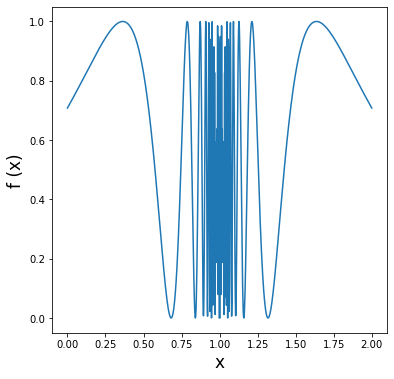

In [2]:
def f(x):
    return np.sin(1/(1-x))**2

def hit_miss_method(N):
    count = 0
    for i in range(N):
        x = 2 * np.random.random() 
        y = np.random.random() 
        if y < f(x): 
            count += 1
    return 2 * count / N

def mean_value_method(N):
    r_i = np.random.uniform(0,2,N)   #uniform in the integration space (between 0 and 2)
    return 2 / N * np.sum(f(r_i))

x = np.linspace(0.00001,1.99999,1000)
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x,f(x))
ax.set_xlabel('x', fontsize=17)
ax.set_ylabel('f (x)', fontsize=17)

#hit/miss method
values = []
N = 10000
n = 100

for i in range(n):
    v = hit_miss_method(N)
    values.append(v)

values = np.array(values)
mean = np.mean(values)
sigma = np.std(values)

print("Result of the integral with the hit/miss method", round(mean,4), "with an error of", round(sigma,4))

#mean value method
values2 = []
for i in range(n):
    v = mean_value_method(N)
    values2.append(v)

mean2 = np.mean(values2)
sigma2 = np.std(values2)

print("Result of the integral with the mean value method", round(mean2,4), "with an error of", round(sigma2,4))

#the two results are very similar, the mean value seems to be more accurate since it presents a lower std

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [3]:
N = 10000
n = 100

def circle(N):
    count = 0
    for i in range(N):
        x = np.random.uniform(-1,1)     # x is random uniform between -1 and 1
        y = np.random.uniform(-1,1)     # y is random uniform between -1 and 1
        if x**2 + y**2 <= 1: 
            count += 1
    return 4 * count / N   #4 comes from the fact that the bounds are -1 and 1 for both axis

values = []
for i in range(n):
    v = circle(N)
    values.append(v)

values = np.array(values)
mean = np.mean(values)
sigma = np.std(values)
    
print("Area of a circle of unit radius is:", round(mean,4), "with an error of", round(sigma,4))

#now generalization for 10 dimensions
dims = []
dim = 10
def sphere(N, dim):
    count = 0
    for i in range(N):
        dims.clear()
        for j in range(dim):
            d = (np.random.uniform(-1,1))**2
            dims.append(d)
        if np.sum(np.array(dims)) <= 1:
            count +=1
    return 2**dim * count / N

values2 = []
for i in range(n):
    v = sphere(N, dim)
    values2.append(v)

values2 = np.array(values2)
mean2 = np.mean(values2)
sigma2 = np.std(values2)

print("Volume of a sphere of 10 dimensions is ", round(mean2,4), "with an error of", round(sigma2,4))

Area of a circle of unit radius is: 3.141 with an error of 0.0165
Volume of a sphere of 10 dimensions is  2.5907 with an error of 0.509


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [4]:
def w(x):
    return 1/np.sqrt(x)

def f(x):
    return (x**(-0.5))/(1 + np.exp(x))
    
N = 10000
n = 100
x = (np.random.uniform(0,1,N))**2
V = 2

I = (1/N) * np.sum(f(x)/w(x))*V
    
print("Integral with importance sampling:", I)

Integral with importance sampling: 0.8364931147731648
